
# **Running Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [ ]:
# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
spark.version
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)

<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name : pyspark-shell


In [ ]:
# Create SparkContext
from pyspark import SparkContext
sc = SparkContext("local", "ALY6110_App")
print(sc.appName)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=ALY6110_App, master=local) created by __init__ at <ipython-input-5-9692e1eb3bde>:3 

In [ ]:
# Step 1: Read the given CSV file
df = spark.read.csv('/content/BostonHousing.csv', sep=',', inferSchema=True, header=True)
df_main = df

In [ ]:
# Step 2: Show the first 5 elements of your dataset
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



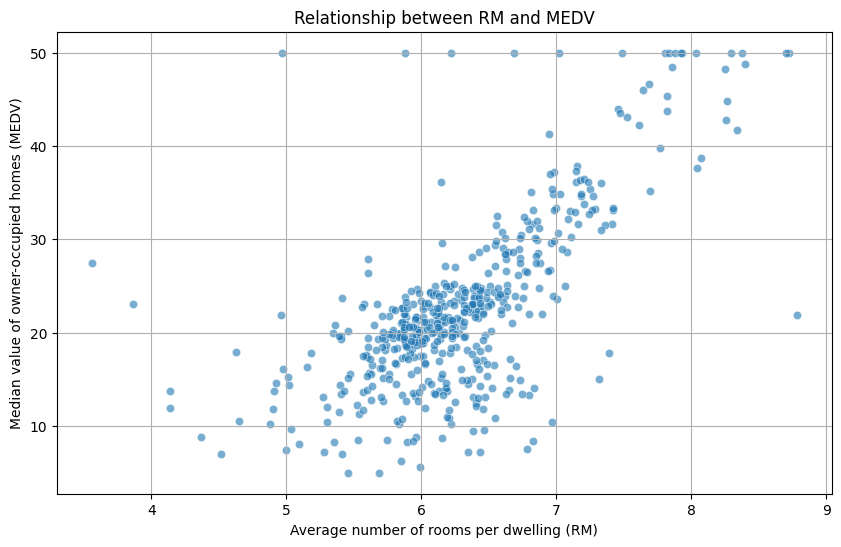

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
pd_df = pd.read_csv('/content/BostonHousing.csv')

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pd_df['rm'], pd_df['medv'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Relationship between RM and MEDV')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.grid(True)
plt.show()


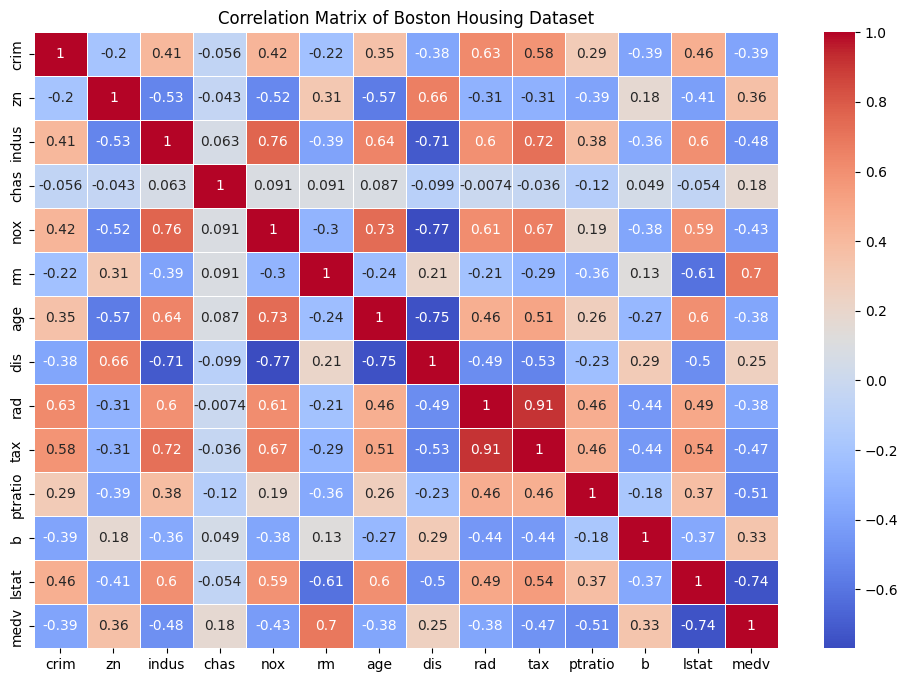

In [ ]:
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
corr_matrix = pd_df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Boston Housing Dataset')
plt.show()


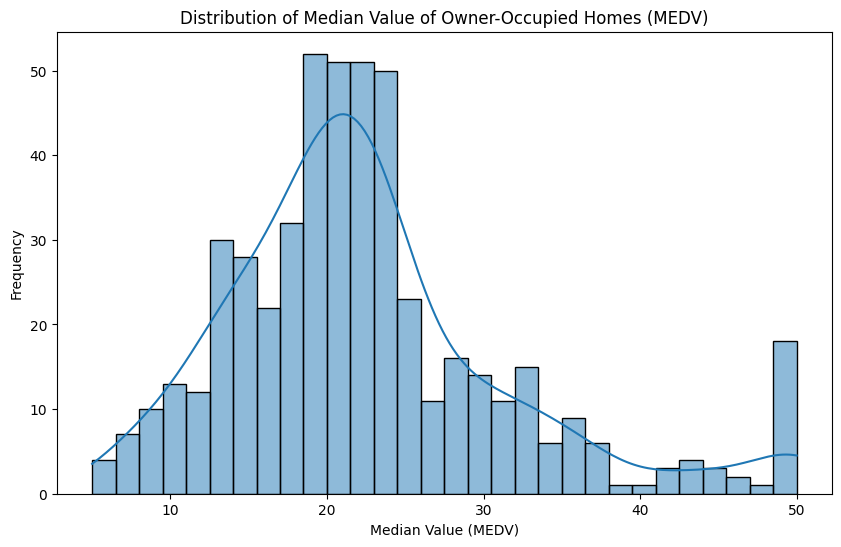

In [ ]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(pd_df['medv'], kde=True, bins=30)
plt.title('Distribution of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value (MEDV)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
sc.stop()

In [ ]:
spark.sparkContext.stop()